In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import joblib
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('accident.csv')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

In [ ]:
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


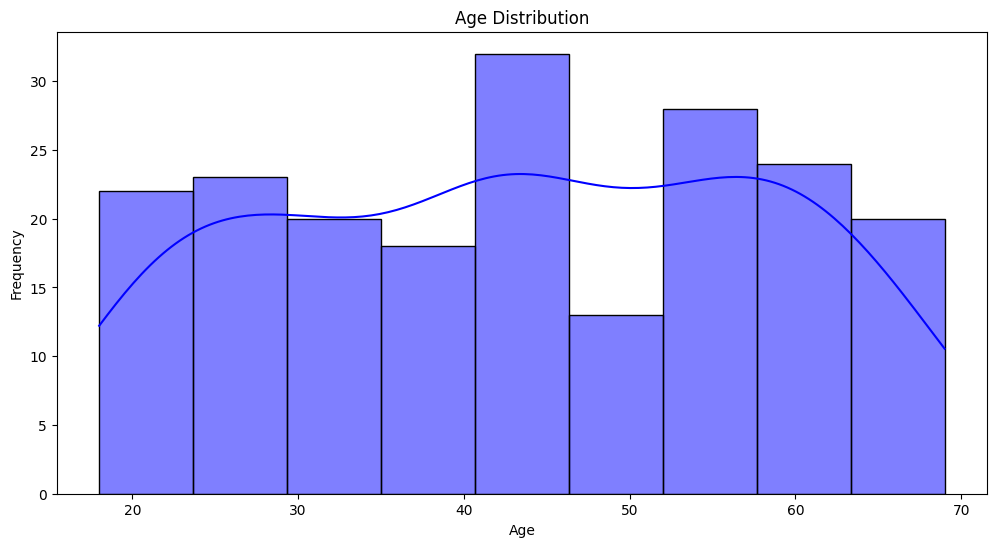

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

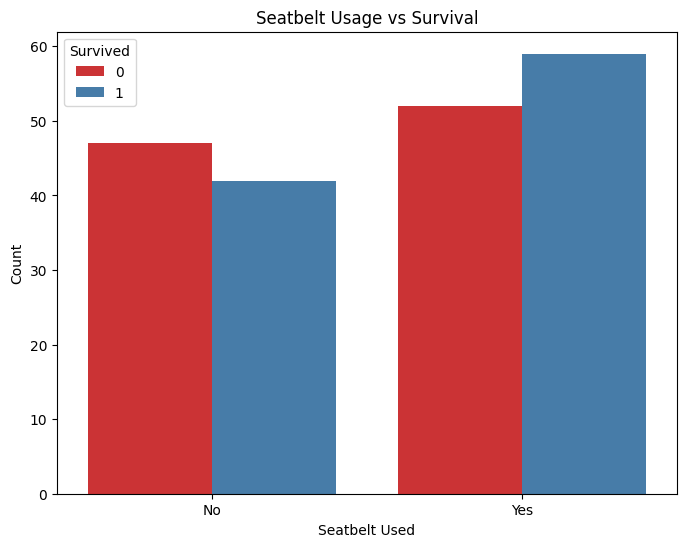

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Seatbelt_Used', hue='Survived', data=df, palette='Set1')
plt.title('Seatbelt Usage vs Survival')
plt.xlabel('Seatbelt Used')
plt.ylabel('Count')
plt.show()


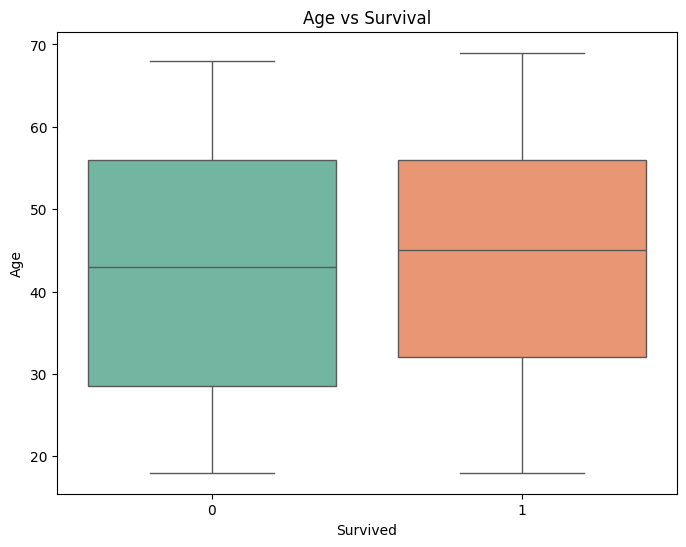

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

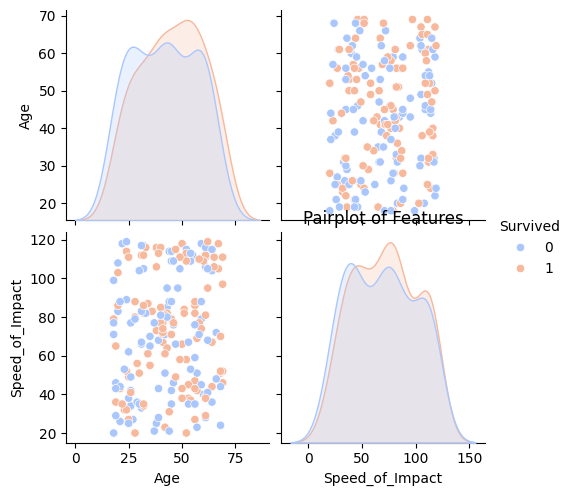

In [ ]:
sns.pairplot(df, hue='Survived', palette='coolwarm')
plt.title('Pairplot of Features')
plt.show()

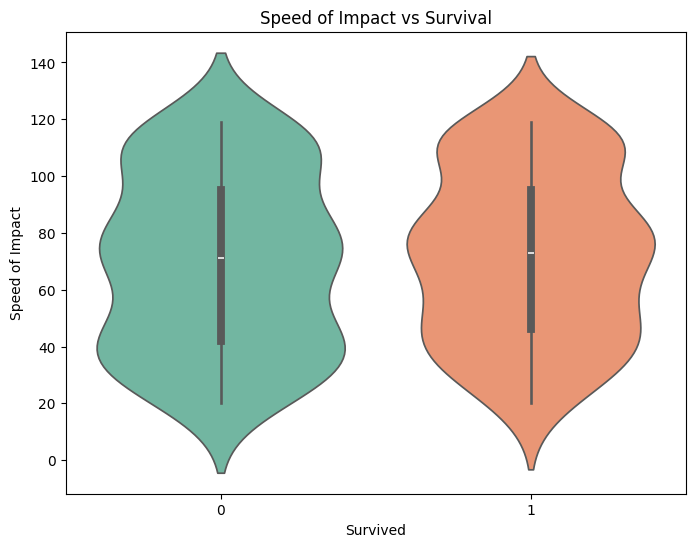

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Speed_of_Impact', data=df, palette='Set2')
plt.title('Speed of Impact vs Survival')
plt.xlabel('Survived')
plt.ylabel('Speed of Impact')
plt.show()

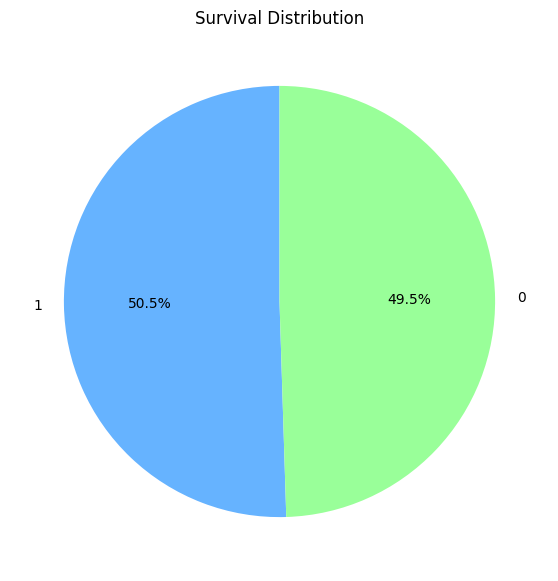

In [ ]:
plt.figure(figsize=(7,7))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()

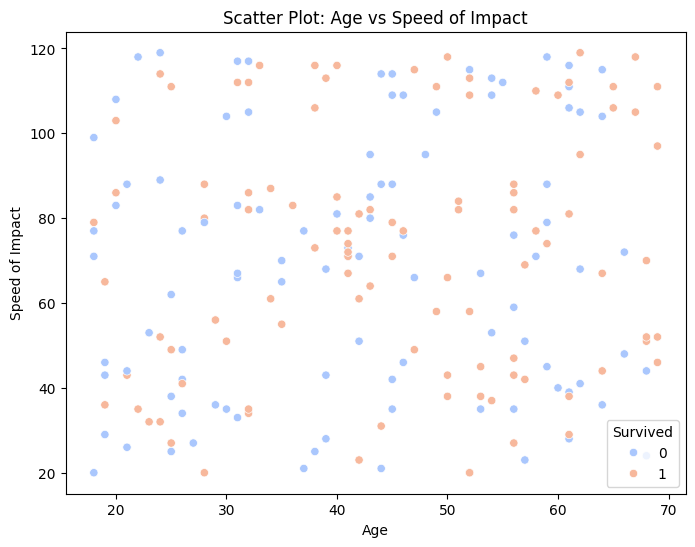

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Speed_of_Impact', data=df, hue='Survived', palette='coolwarm')
plt.title('Scatter Plot: Age vs Speed of Impact')
plt.xlabel('Age')
plt.ylabel('Speed of Impact')
plt.show()

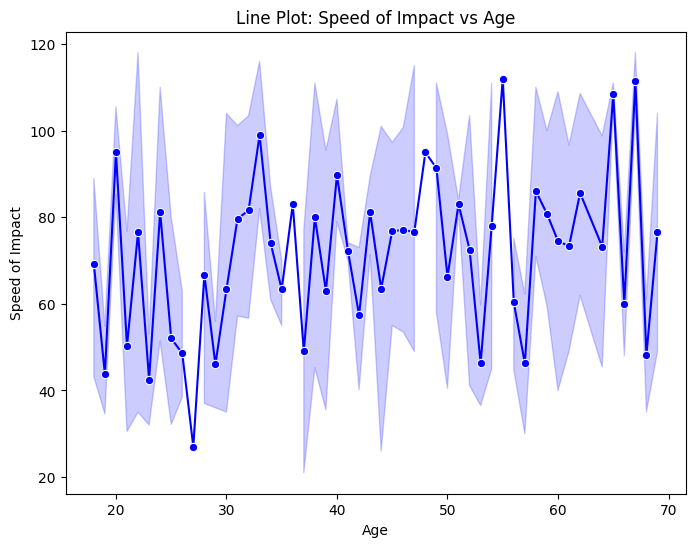

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Age', y='Speed_of_Impact', data=df, marker='o', color='blue')
plt.title('Line Plot: Speed of Impact vs Age')
plt.xlabel('Age')
plt.ylabel('Speed of Impact')
plt.show()

In [ ]:
label_encoders = {}
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    results.append((name, accuracy, roc_auc))

[LightGBM] [Info] Number of positive: 83, number of negative: 77
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518750 -> initscore=0.075035
[LightGBM] [Info] Start training from score 0.075035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print(results_df.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy   ROC AUC
3  K-Nearest Neighbors     0.600  0.497475
2        Random Forest     0.550  0.521465
6    Gradient Boosting     0.550  0.469697
0  Logistic Regression     0.525  0.525253
9             LightGBM     0.525  0.463384
8              XGBoost     0.500  0.472222
5          Naive Bayes     0.475  0.502525
1        Decision Tree     0.450  0.454545
4                  SVM     0.450  0.372475
7             AdaBoost     0.450  0.398990


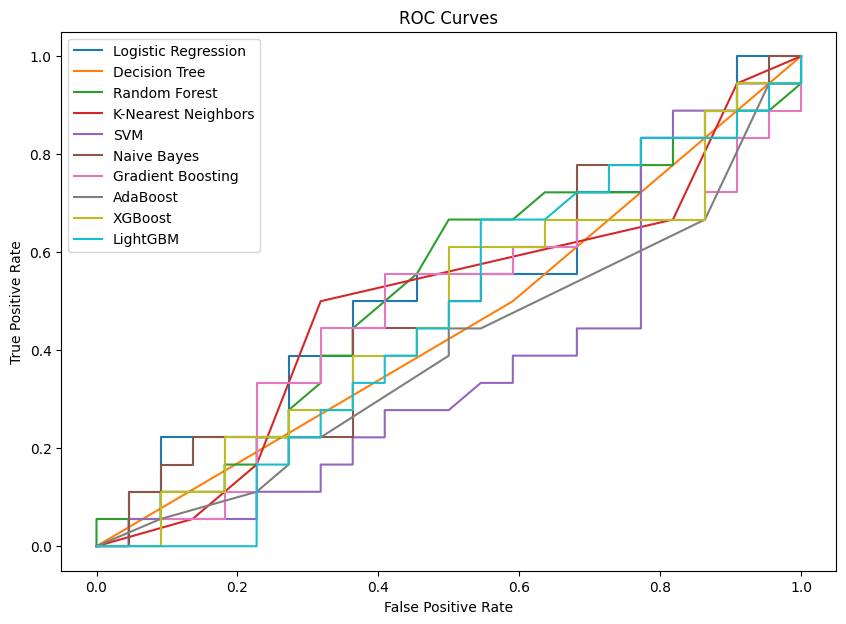

In [ ]:
plt.figure(figsize=(10, 7))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [ ]:
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
joblib.dump(best_model, "best_classification_model.pkl")

['best_classification_model.pkl']